## Data Description

|    Variable            	|    Definition                         |     
|---------------------------|---------------------------------------|
|    employee_id         	|    Unique ID for employee             |     
|    department          	|    Department of employee             |     
|    region              	|    Region of employment (unordered)   |     
|    education           	|    Education Level                    |     
|    gender              	|    Gender of Employee                 |     
|    recruitment_channel 	|    Channel of recruitment for employee |    
|    no_of_trainings     	|    no of other trainings completed in previous year on soft skills, technical skills etc. |
|    age                 	|    Age of Employee                         |
|    previous_year_rating	|    Employee Rating for the previous year   |
|    length_of_service   	|    Length of service in years              
|    KPIs_met >80%       	|    if Percent of KPIs(Key performance Indicators) >80% then 1 else 0 |
|    awards_won?         	|    if awards won during previous year then 1 else 0 |
|    avg_training_score  	|    Average score in current training evaluations |
|    is_promoted         	|    (Target) Recommended for promotion      |


## EVALUATION METRIC

The evaluation metric for this competition is F1 Score.


## Importing Python Modules

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union

In [40]:
sns.set_style('whitegrid')
# sns.set(context="paper", font="monospace")

## Data Loading 

In [6]:
def load_training_dataset():
    return pd.read_csv('data/train_LZdllcl.csv', index_col='employee_id')
df = load_training_dataset()
df = df.rename(columns={'KPIs_met >80%':'is_kpi_met', 'awards_won?':'has_won_awards'})
print('Train Data Size :', df.shape)
df.head()

Train Data Size : (54808, 13)


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,is_kpi_met,has_won_awards,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
test = pd.read_csv('data/test_2umaH9m.csv', index_col='employee_id')
test = test.rename(columns={'KPIs_met >80%':'is_kpi_met', 'awards_won?':'has_won_awards'})
print('Test Data Size :', test.shape)
test.head()

Test Data Size : (23490, 12)


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,is_kpi_met,has_won_awards,avg_training_score
employee_id,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [8]:
test.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
is_kpi_met                 0
has_won_awards             0
avg_training_score         0
dtype: int64

## Data Pre-processing 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
is_kpi_met              54808 non-null int64
has_won_awards          54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
is_kpi_met,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
has_won_awards,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0
iregion,54808.0,14.195045,10.086273,1.0,4.0,13.0,22.0,34.0


In [10]:
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
is_kpi_met                 0
has_won_awards             0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
df[df.education.isnull() == True].head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,is_kpi_met,has_won_awards,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0


In [12]:
# Is there anyone who is promoted whose education is null??
mask = (df.education.isnull() == True) & (df.is_promoted == 1)
print('Is there anyone who is promoted whose education is null?? : ', df[mask].shape[0], 'folks!')
df[mask].describe().T

Is there anyone who is promoted whose education is null?? :  122 folks!


,count,mean,std,min,25%,50%,75%,max
no_of_trainings,122.0,1.114754,0.533145,1.0,1.0,1.0,1.0,6.0
age,122.0,29.172131,6.729352,20.0,24.0,28.0,32.0,60.0
previous_year_rating,97.0,4.061856,1.028899,1.0,3.0,4.0,5.0,5.0
length_of_service,122.0,3.950820,3.177536,1.0,2.0,3.0,5.0,16.0
is_kpi_met,122.0,0.704918,0.457960,0.0,0.0,1.0,1.0,1.0
has_won_awards,122.0,0.163934,0.371743,0.0,0.0,0.0,0.0,1.0
avg_training_score,122.0,68.008197,17.208731,45.0,50.0,64.0,85.0,98.0
is_promoted,122.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [16]:
list(df.education.unique())

["Master's & above", "Bachelor's", nan, 'Below Secondary']

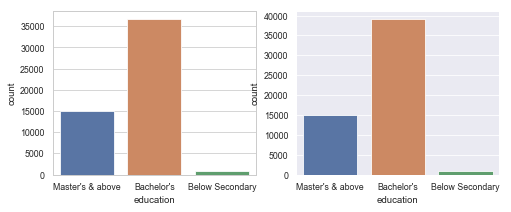

In [48]:
f = plt.figure(figsize=(8,3))
ax = f.add_subplot(1, 2, 1)
sns.countplot(x='education', data=df)    

with sns.axes_style("darkgrid"):    
    f.add_subplot(1, 2, 2)
    sns.countplot(x='education', data=fillna_pipe.fit_transform(df))    

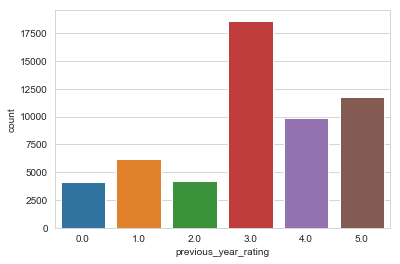

In [18]:
# sns.countplot(x='previous_year_rating', data=df)
sns.countplot(x='previous_year_rating', data=fillna_pipe.fit_transform(df))

In [19]:
df[df.previous_year_rating.isnull() == True].head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,is_kpi_met,has_won_awards,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0


In [20]:
# Is there anyone who is promoted whose previous_year_rating is null??
mask = (df.previous_year_rating.isnull() == True) & (df.is_promoted == 1)
print('Is there anyone who is promoted whose previous_year_rating is null?? : ', df[mask].shape[0], 'folks!')
# df[mask].head()

Is there anyone who is promoted whose previous_year_rating is null?? :  339 folks!


In [21]:
# Is there anyone whose length_of_service>1  with previous_year_rating as null??
mask = (df.previous_year_rating.isnull() == True) & (df.length_of_service > 1)
print('Is there anyone whose length_of_service>1  with previous_year_rating as null?? : ', df[mask].shape[0], 'folks!')
# df[mask].head()
# Observation
# If only length_of_service=1, the previous_year_rating = NaN
# Possibility of FeatureEngineering?? length_of_service*previous_year_rating, setting NaN=0 
# [Could be wrong bcoz only last rating is available. What if last ratig is bad but exp is more?]
# How does this look for test dataset?

Is there anyone whose length_of_service>1  with previous_year_rating as null?? :  0 folks!


In [22]:
# How does this look for test dataset?
# Is there anyone whose length_of_service>1  with previous_year_rating as null??
mask = (test.previous_year_rating.isnull() == True) & (test.length_of_service > 1)
print('Is there anyone whose length_of_service>1  with previous_year_rating as null in TEST DATASET?? : ', test[mask].shape[0], 'folks!')
# None, so we can set the value as Zero

Is there anyone whose length_of_service>1  with previous_year_rating as null in TEST DATASET?? :  0 folks!


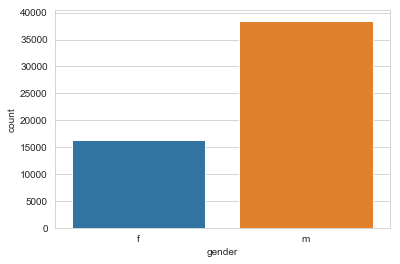

In [24]:
sns.countplot(x='gender', data=df)

Possible Regions :  ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

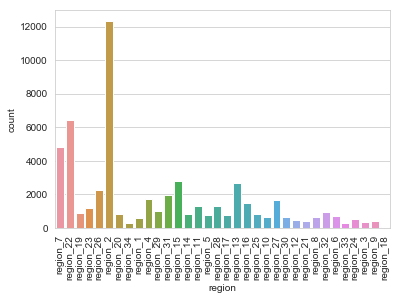

In [25]:
print('Possible Regions : ', df.region.unique())
ax = sns.countplot(x='region', data=df)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(rotation=90)

In [30]:
df['iregion'] = df['region'].apply(lambda x: x.split('_')[1])
df['iregion'] = df['iregion'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 14 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
is_kpi_met              54808 non-null int64
has_won_awards          54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
iregion                 54808 non-null int8
dtypes: float64(1), int64(7), int8(1), object(5)
memory usage: 8.4+ MB


In [33]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,is_kpi_met,has_won_awards,avg_training_score,is_promoted,iregion
employee_id,,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,7
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,22
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,19
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,23
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,26


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 14 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
is_kpi_met              54808 non-null int64
has_won_awards          54808 non-null int64
avg_training_score      54808 non-null int8
is_promoted             54808 non-null int8
iregion                 54808 non-null int8
dtypes: float64(1), int64(5), int8(3), object(5)
memory usage: 7.7+ MB


In [49]:
print(df.info())

df['iregion'] = df['iregion'].astype(np.int8)
df['is_promoted'] = df['is_promoted'].astype(np.int8)
df['avg_training_score'] = df['avg_training_score'].astype(np.int8)
df['has_won_awards'] = df['has_won_awards'].astype(np.int8)
df['is_kpi_met'] = df['is_kpi_met'].astype(np.int8)
df['length_of_service'] = df['length_of_service'].astype(np.int8)
df['age'] = df['age'].astype(np.int8)
df['no_of_trainings'] = df['no_of_trainings'].astype(np.int8)

df['previous_year_rating'] = df['previous_year_rating'].astype(np.float16)

df['department'] = df['department'].astype('category')
df['region'] = df['region'].astype('category')
df['education'] = df['education'].astype('category')
df['gender'] = df['gender'].astype('category')
df['recruitment_channel'] = df['recruitment_channel'].astype('category')

print('\nAfter processing:\n',)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 14 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int8
age                     54808 non-null int8
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int8
is_kpi_met              54808 non-null int8
has_won_awards          54808 non-null int8
avg_training_score      54808 non-null int8
is_promoted             54808 non-null int8
iregion                 54808 non-null int8
dtypes: float64(1), int8(8), object(5)
memory usage: 5.8+ MB
None

After processing:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 14 columns):
department              54808 non-null category
region     

## Data Modeling

In [51]:
class RatingsImputer(BaseEstimator, TransformerMixin):
    def fit (self, X, y=None, **fit_params):
        return self
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        #X.loc[X.previous_year_rating.isnull(), 'previous_year_rating'] = 0
        X = X.fillna({'previous_year_rating':0})
        return X

class EducationCleanser(BaseEstimator, TransformerMixin):
    def fit (self, X, y=None, **fit_params):
        return self
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        X = X.fillna({'education':"Bachelor's"})
        return X

# fillna_pipe.fit_transform(df).isnull().sum() # For Testing purpose only

In [92]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    
    def fit (self, X, y=None, **fit_params):
        return self
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

# class ModifiedLabelEncoder(LabelEncoder):
#     def fit_transform(self, y, *args, **kwargs):
#         print(type(y))
#         print(y.head(5))
#         return super().fit_transform(y).reshape(-1, 1)

#     def transform(self, y, *args, **kwargs):
#         return super().transform(y).reshape(-1, 1)

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using LabelEncoder(). 
        If no columns specified, transforms all columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel'] # list of categorical column names    
numeric_cols = [ col for col in df.columns.difference(categorical_cols) if col not in ['is_promoted', 'iregion']]

fillna_pipe = make_pipeline(RatingsImputer(), EducationCleanser())
# categorical_cols_pipe = make_pipeline(ColumnSelector(columns=categorical_cols), ModifiedLabelEncoder(), OneHotEncoder(sparse=False))
categorical_cols_pipe = make_pipeline(ColumnSelector(columns=categorical_cols), MultiColumnLabelEncoder())
numeric_cols_pipe = make_pipeline(ColumnSelector(columns=numeric_cols),MinMaxScaler())

# categorical_cols_pipe.fit_transform(df.head(5))
# numeric_cols_pipe.fit_transform(df.head(5))

,department,region,education,gender,recruitment_channel
employee_id,,,,,
65438,1,4,1,0,1
65141,0,1,0,1,0
7513,1,0,0,1,1
2542,1,2,0,1,0
48945,2,3,0,1,0


In [95]:
# [ col for col in df.columns.difference(categorical_cols) if col not in ['is_promoted', 'iregion']]
fu = make_union(numeric_cols_pipe, categorical_cols_pipe)
pipe = make_pipeline(fillna_pipe, fu)
train_vec = pipe.fit_transform(df)
print(train_vec.shape)
print(train_vec[:3])

(54808, 12)
[[ 0.375       0.16666667  0.          1.          0.19444444  0.
   1.          7.         31.          2.          0.          2.        ]
 [ 0.25        0.35        0.          0.          0.08333333  0.
   1.          4.         14.          0.          1.          0.        ]
 [ 0.35        0.18333333  0.          0.          0.16666667  0.
   0.6         7.         10.          0.          1.          2.        ]]


In [100]:
# Split train data-set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_vec, df.is_promoted, train_size = 0.75, random_state = 42)

In [94]:
test_vec = pipe.transform(test)
test_vec[:5]

array([[ 0.1       ,  0.63333333,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  8.        , 18.        ,  0.        ,
         1.        ,  2.        ],
       [ 0.275     ,  0.2       ,  0.        ,  0.        ,  0.11111111,
         0.        ,  0.6       ,  2.        , 28.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.275     ,  0.13333333,  0.        ,  0.        ,  0.08333333,
         0.        ,  0.2       ,  7.        ,  4.        ,  0.        ,
         1.        ,  0.        ],
       [ 0.275     ,  0.43333333,  0.        ,  0.        ,  0.22222222,
         0.22222222,  0.4       ,  5.        , 11.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.25      ,  0.36666667,  0.        ,  0.        ,  0.16666667,
         0.        ,  0.8       ,  1.        , 21.        ,  0.        ,
         1.        ,  2.        ]])

## SGDClassifier

In [117]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_validate

# Ref.: https://stackoverflow.com/questions/37413302/f1-score-of-all-classes-from-scikits-cross-val-score
# Ref.: https://stackoverflow.com/questions/35876508/evaluate-multiple-scores-on-sklearn-cross-val-score
svm_clf = SGDClassifier()
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
# scores = cross_val_score(svm_clf, x_train, y_train, cv=3, scoring='precision')
# scores = cross_val_score(svm_clf, x_train, y_train, cv=3, scoring='recall')
scores = cross_val_score(svm_clf, x_train, y_train, cv=3, scoring='f1')
# scores = cross_validate(svm_clf, x_train, y_train, cv=3, scoring=scoring)
scores # Check against the recall score, for this is something the  Public LeaderBoard is scoring against.

array([0.27378641, 0.25193108, 0.03135314])

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

svm_clf.fit(x_test, y_test)
preds = svm_clf.predict(x_test)

print('Accuracy = ', np.mean(preds == y_test))

creport = classification_report(y_test, preds, target_names=['Not Promoted', 'Promoted'])
print(creport)

confusion_matrix(y_test, preds)

Accuracy =  0.9162166107137644
              precision    recall  f1-score   support

Not Promoted       0.92      1.00      0.96     12571
    Promoted       0.39      0.03      0.05      1131

 avg / total       0.88      0.92      0.88     13702



array([[12524,    47],
       [ 1101,    30]], dtype=int64)

In [112]:
def conv2df(preds):
    df = pd.DataFrame(data={
        'employee_id': test.index.values,
        'is_promoted': preds
    })
    df['is_promoted'] = df['is_promoted'].astype(np.int8)
    return df

In [113]:
conv2df(svm_clf.predict(test_vec)).to_csv('data/output/SGDClassifier_default.csv', index=False)

## Possible areas of improvement
* Is there a better  way to fill missing values for the 'education' column???